## Regression

### Linear Regression with Analysis Math solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([152,157,160,163,150,147,165,168,170])
y = np.array([54.48,55.84,57.20,56.57,53.12,52.21,59.93,61.29,67.92])

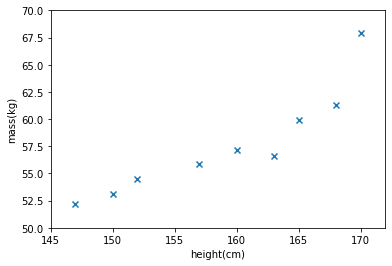

In [ ]:
plt.scatter(X,y,marker='x')
plt.xlim([145,172])
plt.ylim([50,70])
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
plt.show()

In [ ]:
def fit(x,y,k):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  w = np.linalg.inv(X_.T@X_)@X_.T@y
  return w

def predict(x,w,k):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  return X_@w

In [ ]:
w = fit(X,y,1)
w

array([-27.93562969,   0.537696  ])

R2=0.816


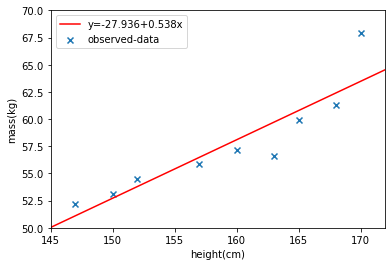

In [ ]:
cov_YY = np.cov(predict(X,w,1),y)
R2 = cov_YY[0,0]/cov_YY[1,1]
print("R2=%.3f"%(R2))
xa = np.linspace(145,172,50)
plt.scatter(X,y,marker='x')
plt.plot(xa,predict(xa,w,1),'r-')
plt.xlim([145,172])
plt.ylim([50,70])
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
y_legend = "y="+str(round(w[0],3))+"+"+str(round(w[1],3))+"x"
plt.legend([y_legend,"observed-data"])
plt.show()

In [ ]:
X = np.array([ 0.  ,  0.11,  0.25,  0.29,  0.41,  0.42,  0.43,  0.8 ,  0.81, 1.  ])
Y = np.array([ 0.04,  0.75,  1.  ,  0.99,  0.31,  0.52,  0.38, -0.99, -1.05, 0.  ])
w = fit(X,Y,3)
print("w=",w)

w= [ 1.14996701e-02  1.05535056e+01 -3.17324025e+01  2.11628099e+01]


R2=0.990


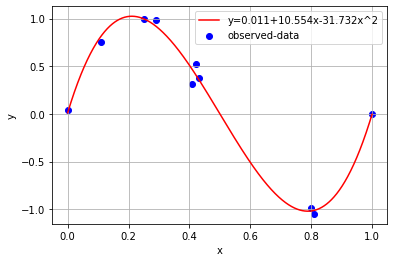

In [ ]:
cov_YY = np.cov(predict(X,w,3),Y)
R2 = cov_YY[0,0]/cov_YY[1,1]
print("R2=%.3f"%(R2))
xa = np.linspace(min(X),max(X),1000)
ya = predict(xa,w,3)
plt.scatter(X,Y,color='b')
plt.plot(xa,ya,'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
y_legend = "y="+str(round(w[0],3))+"+"+str(round(w[1],3))+"x"+str(round(w[2],3))+"x^2"
plt.legend([y_legend,"observed-data"])
plt.show()

w= [ 4.87395932e-02  1.98384029e+02 -4.47755792e+03  4.08986697e+04
 -1.95961522e+05  5.43625437e+05 -9.03237557e+05  8.85913047e+05
 -4.72733950e+05  1.05775053e+05]


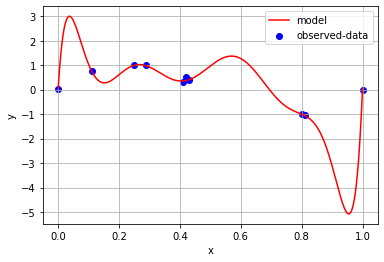

In [ ]:
X = np.array([ 0.  ,  0.11,  0.25,  0.29,  0.41,  0.42,  0.43,  0.8 ,  0.81, 1.  ])
Y = np.array([ 0.04,  0.75,  1.  ,  0.99,  0.31,  0.52,  0.38, -0.99, -1.05, 0.  ])
w = fit(X,Y,9)
print("w=",w)
xa = np.linspace(min(X),max(X),1000)
ya = predict(xa,w,9)
plt.scatter(X,Y,color='b')
plt.plot(xa,ya,'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
#y_legend = "y="+str(round(w[0],3))+"+"+str(round(w[1],3))+"x"+str(round(w[2],3))+"x^2"
plt.legend(["model","observed-data"])
plt.show()

### Linear Regression with Gradient Descent and SGD

In [ ]:
import numpy as np

In [ ]:
#X = np.array([1,3,4,7,9,14])
#y = np.array([3,7,11,19,29,45])
#X = np.array([1, 3, 6, 8])
#y = np.array([3, 6, 5, 7])
X = np.array([1.52,1.57,1.60,1.63,1.50,1.47,1.65,1.68,1.70])
y = np.array([54.48,55.84,57.20,56.57,53.12,52.21,59.93,61.29,67.92])

In [ ]:
XP = np.vstack([np.ones_like(X), X]).T
beta = np.zeros(XP.shape[1])

eta = 1e-3
for t in range(100000):
    y_hat = XP @ beta
    beta -= 2 * eta * XP.T @ (y_hat - y)

In [ ]:
beta

array([-25.76358113,  52.40677129])

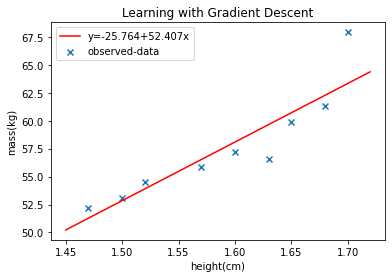

In [ ]:
xa = np.linspace(1.45,1.72,50)
plt.scatter(X,y,marker='x')
plt.plot(xa,predict(xa,beta,1),'r-')
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
y_legend = "y="+str(round(beta[0],3))+"+"+str(round(beta[1],3))+"x"
plt.legend([y_legend,"observed-data"])
plt.title("Learning with Gradient Descent")
plt.show()

In [ ]:
import random
import numpy as np

X = np.array([1.52,1.57,1.60,1.63,1.50,1.47,1.65,1.68,1.70])
y = np.array([54.48,55.84,57.20,56.57,53.12,52.21,59.93,61.29,67.92])

beta = np.zeros(2)
d_index = list(range(len(X)))

eta = 1e-3
for t in range(100000):
  random.shuffle(d_index)
  for i in d_index :
    XP = np.vstack([np.ones_like(X[i]), X[i]]).T
    y_hat = XP @ beta
    beta -= 2 * eta * XP.T @ (y_hat - y[i])

beta

array([-25.78999964,  52.4252311 ])

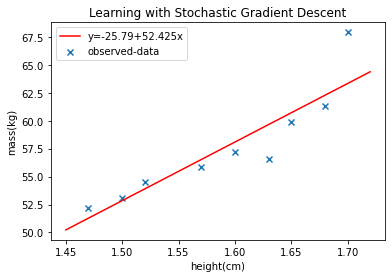

In [ ]:
xa = np.linspace(1.45,1.72,50)
plt.scatter(X,y,marker='x')
plt.plot(xa,predict(xa,beta,1),'r-')
plt.xlabel('height(cm)')
plt.ylabel('mass(kg)')
y_legend = "y="+str(round(beta[0],3))+"+"+str(round(beta[1],3))+"x"
plt.legend([y_legend,"observed-data"])
plt.title("Learning with Stochastic Gradient Descent")
plt.show()

### Regulization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fit(x,y,k):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  w = np.linalg.inv(X_.T@X_)@X_.T@y
  return w

def predict(x,w,k):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  return X_@w

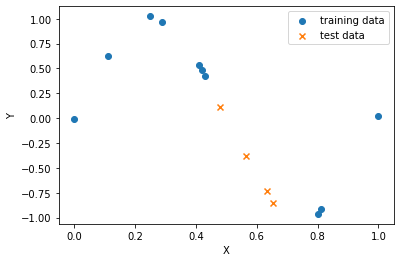

In [ ]:
# Data: train
Xtrain = np.array([0.  ,  0.11,  0.25,  0.29,  0.41,  0.42,  0.43,  0.8 ,  0.81, 1.])
Ytrain = np.sin(2*np.pi*Xtrain)+0.02*np.random.randn(len(Xtrain))
# Data: test
Xtest = np.array([0.654,0.633,0.48,0.564])
Ytest = np.sin(2*np.pi*Xtest)+0.02*np.random.randn(len(Xtest))

plt.scatter(Xtrain,Ytrain,marker='o')
plt.scatter(Xtest,Ytest,marker='x')
plt.legend(['training data','test data'])
plt.xlabel('X'); plt.ylabel('Y')
plt.show()

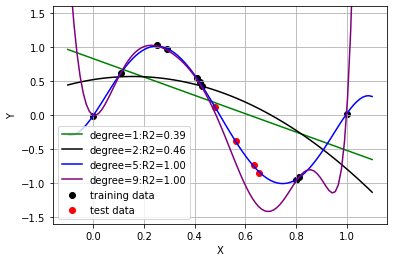

In [ ]:
colors = ['green','black','blue','purple']
degree = [1,2,5,9]
w_fit = []
R2 = []
plt.scatter(Xtrain,Ytrain,marker='o',color='black')
plt.scatter(Xtest,Ytest,marker='o',color='red')
xa = np.linspace(min(Xtrain)-0.1,max(Xtrain)+0.1,100)
for i,d in enumerate(degree):
  w = fit(Xtrain,Ytrain,d)
  w_fit.append(w)
  ya = predict(xa,w,d)
  plt.plot(xa,ya,colors[i])
  cov_YY = np.cov(predict(Xtrain,w,d)-Ytrain,Ytrain,bias=True)
  r2 =1- cov_YY[0,0]/cov_YY[1,1]
  R2.append(r2)
plt.ylim([-1.6,1.6])
plt.grid()
plt.legend(['degree='+str(i)+':R2=%.2f'%(r) for i,r in zip(degree,R2)]+['training data','test data'])
plt.xlabel('X'); plt.ylabel('Y')
plt.show()


In [ ]:
def ridge_fit(x,y,k,alpha):
  X_ = np.zeros((len(x),k+1))
  for i in range(k+1):
    X_[:,i] = x**i
  beta = np.linalg.inv(X_.T@X_+alpha*np.eye(k+1))@X_.T@y
  return beta

# learning with SGD
def ridge_sgd_fit(x,y,k,alpha):
  beta = np.zeros(k+1)
  d_index = list(range(len(x)))

  eta = 1e-4
  for t in range(500000):
    random.shuffle(d_index)
    for i in d_index :
      xi = np.zeros(k+1)
      for j in range(k+1):
        xi[j] = x[i]**j
      y_hat = xi.T @ beta
      beta = (1-2*alpha*eta/len(x))*beta - 2 * eta * (y_hat - y[i]) * xi
  return beta

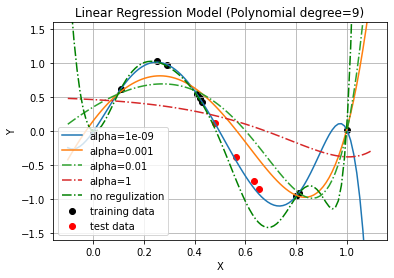

In [ ]:
markers = ['-','-','-.','-.']
alphas = [1e-9,1e-3,1e-2,1]
w_fit = []
d = 9
plt.scatter(Xtrain,Ytrain,marker='o',color='black')
plt.scatter(Xtest,Ytest,marker='o',color='red')
for i,alpha in enumerate(alphas):
  w = ridge_fit(Xtrain,Ytrain,d,alpha)
  #w = ridge_sgd_fit(Xtrain,Ytrain,d,alpha)
  w_fit.append(w)
  xa = np.linspace(min(Xtrain)-0.1,max(Xtrain)+0.1,100)
  ya = predict(xa,w,d)
  plt.plot(xa,ya,markers[i])
plt.grid()
plt.plot(xa,predict(xa,fit(Xtrain,Ytrain,d),d),'g-.')
plt.ylim([-1.6,1.6])
plt.legend(['alpha='+str(i) for i in alphas]+['no regulization','training data','test data'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model (Polynomial degree=9)')
plt.show()

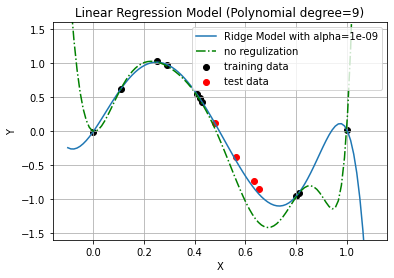

In [ ]:
markers = ['-','-']
alphas = [1e-9]
w_fit = []
d = 9
plt.scatter(Xtrain,Ytrain,marker='o',color='black')
plt.scatter(Xtest,Ytest,marker='o',color='red')
for i,alpha in enumerate(alphas):
  w = ridge_fit(Xtrain,Ytrain,d,alpha)
  #w = ridge_sgd_fit(Xtrain,Ytrain,d,alpha)
  w_fit.append(w)
  xa = np.linspace(min(Xtrain)-0.1,max(Xtrain)+0.1,100)
  ya = predict(xa,w,d)
  plt.plot(xa,ya,markers[i])
plt.grid()
plt.plot(xa,predict(xa,fit(Xtrain,Ytrain,d),d),'g-.')
plt.ylim([-1.6,1.6])
plt.legend(['Ridge Model with alpha='+str(i) for i in alphas]+['no regulization','training data','test data'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model (Polynomial degree=9)')
plt.show()

### EXAMPLE of REGRESSION

ម៉ូឌែលសម្រាប់ទស្សន៍ទាយតម្លៃផ្ទះ

ទាញយកទិន្នន័យ

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

--2021-01-07 05:41:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32717 (32K) [application/x-httpd-php]
Saving to: ‘Real estate valuation data set.xlsx’

Real estate valuati 100%[===================>]  31.95K  --.-KB/s    in 0.07s   

2021-01-07 05:41:21 (483 KB/s) - ‘Real estate valuation data set.xlsx’ saved [32717/32717]



In [ ]:
import pandas as pd

df = pd.read_excel('/content/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


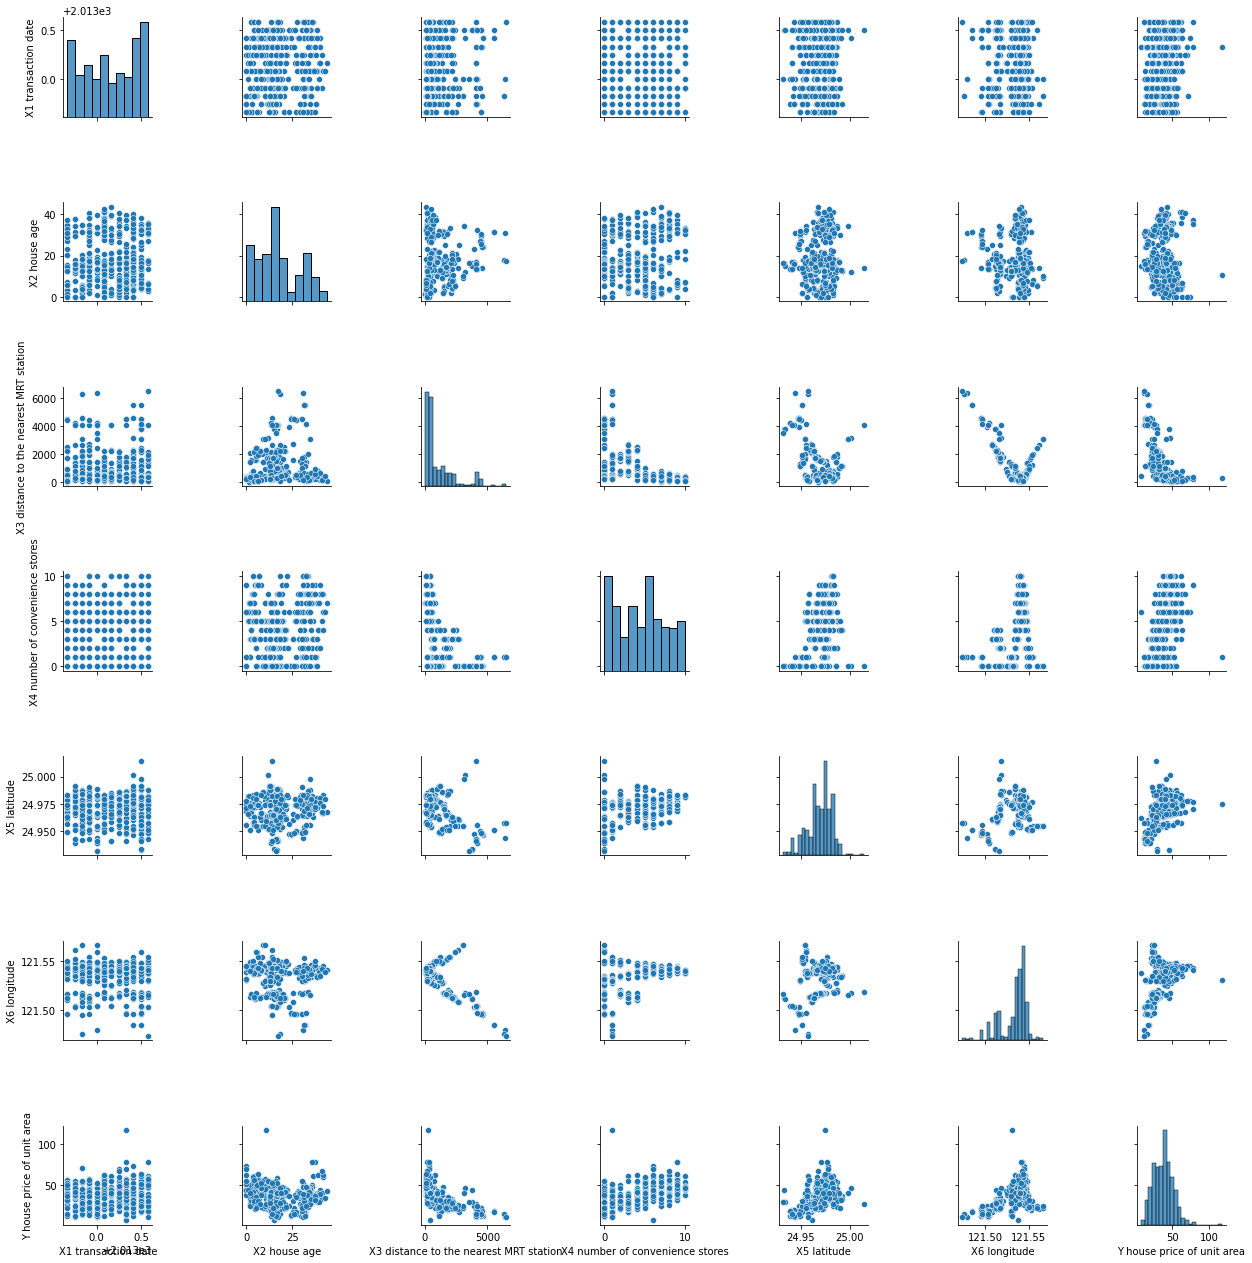

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = df.columns[1:]
sns.pairplot(df[cols])
plt.tight_layout()
plt.savefig('data_visualize.jpg')
plt.show()

បែងចែកទិន្នន័យ training and test

In [ ]:
data = df.to_numpy()
data.shape

(414, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data[:,2:5]
Y = data[:,7]
print(X.shape)
print(Y.shape)

X_std = StandardScaler().fit_transform(X)

Xtrain = X_std[:300]
Ytrain = Y[:300]
Xtest = X_std[300:]
Ytest = Y[300:]
print(Xtrain.shape)
print(Xtest.shape)

(414, 3)
(414,)
(300, 3)
(114, 3)


In [ ]:
Xtrain[0],X[0]

(array([ 1.25562833, -0.79249504,  2.00740743]),
 array([32.     , 84.87882, 10.     ]))

ដោះស្រាយតាមគណិតវិទ្យាវិភាគដោយ Python

In [ ]:
import numpy as np

def fit(X,Y):
  X_ = np.concatenate([np.ones(X.shape[0]).reshape(X.shape[0],1),X],axis=1)
  w = np.linalg.inv(X_.T@X_)@X_.T@Y
  return w

def predict(X,w):
  X_ = np.concatenate([np.ones(X.shape[0]).reshape(X.shape[0],1),X],axis=1)
  return X_@w

def error(X,Y,w):
  Ypred = predict(X,w)
  errors = Ypred - Y
  return np.mean(errors**2)

In [ ]:
w = fit(Xtrain,Ytrain)
print("intercept:",w[0])
print("coef_:",w[1:])

intercept: 38.05793539309134
coef_: [-3.25974924 -6.71864251  3.68303701]


In [ ]:
train_error = error(Xtrain,Ytrain,w)
test_error = error(Xtest,Ytest,w)
print("Training Error : ", train_error)
print("Test Error : ", test_error)

Training Error :  90.64660811010259
Test Error :  69.95480150723698


In [ ]:
cov_train = np.cov((Ytrain-predict(Xtrain,w)),Ytrain)
print("training R2:",1-cov_train[0,0]/cov_train[1,1])
cov_test = np.cov((Ytest-predict(Xtest,w)),Ytest)
print("test R2:",1-cov_test[0,0]/cov_test[1,1])

training R2: 0.5300051343662977
test R2: 0.5716946571452238


In [ ]:
print("Example of Prediction")
predict_value = predict(Xtest,w)
idx = [410,370]
for id in idx:
  print("=========================")
  print("Explain variables:",X[id])
  print("Predict value:",predict_value[id-300])
  print("True value:",Ytest[id-300])


Example of Prediction
Explain variables: [ 5.6     90.45606  9.     ]
Predict value: 52.964154478720275
True value: 50.0
Explain variables: [ 15.9    289.3248   5.    ]
Predict value: 43.94598181406467
True value: 42.1


ប្រើ sklearn.linear_model package

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("intercept:",model.intercept_)
print("coef_:",model.coef_)

intercept: 38.057935393091334
coef_: [-3.25974924 -6.71864251  3.68303701]


In [ ]:
train_error = np.mean((model.predict(Xtrain)-Ytrain)**2)
test_error = np.mean((model.predict(Xtest)-Ytest)**2)
print("Training Error : ", train_error)
print("Test Error : ", test_error)

Training Error :  90.64660811010258
Test Error :  69.95480150723695


In [ ]:
print("training R2:",model.score(Xtrain,Ytrain))
print("test R2:",model.score(Xtest,Ytest))

training R2: 0.5300051343662978
test R2: 0.5712060776488699
